In [1]:
import sys
import os
import tensorflow as tf

sys.path.insert(0, "..")
os.environ['SM_FRAMEWORK']='tf.keras' 
tf.config.list_physical_devices('GPU')

2023-03-02 14:14:49.401341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 14:14:49.809657: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-02 14:14:49.809694: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-02 14:14:49.869227: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-02 14:14:51.258072: W tensorflow/stream_executor/platform/de

[]

In [5]:
from lib.experiments import runs
from lib.data import dataloaders
import numpy as np

In [6]:
basedir="/home/rlx/data/nlbe/"
#basedir="/opt/data/"

# 1. Configure the experiment

In [9]:
# load preset models
from lib.confs import kqm as kqmconfs
from lib.confs import classic as classicconfs
from lib.confs import nlbe

wandb_project = 'qm4lp-test-experiments'
wandb_entity  = 'mindlab'

model = classicconfs.downsampl01
print (model['model_init_args'])

run = runs.Run(
               **model,
               dataloader_split_method = dataloaders.S2_ESAWorldCover_DataLoader.split_per_partition,
               dataloader_split_args = dict (
                    basedir = f'{basedir}/nlbe_sentinel2rgb_2020_landcover/',
                    partitions_id = 'communes',
                    batch_size = 32,
                    cache_size = 1000,
                    shuffle = True,
                    max_chips = 500
                ),
               
               class_weights=nlbe.nlbe_class_weights,
    
               wandb_project = wandb_project,
               wandb_entity = wandb_entity,
               log_imgs = True,
               log_confusion_matrix = True,
    
               loss = 'kldiv',
               learning_rate = 0.001,
            
               epochs = 2
              )

{'conv_layers': [{'kernel_size': 8, 'filters': 96, 'activation': 'relu', 'padding': 'valid', 'strides': 4, 'dropout': 0.1}]}
autoinit on Run
using model Custom_DownsamplingSegmentation
using partitions communes
using loss kldiv


# 2. Initialize the experiment

setup dataloaders and wandb

In [11]:
run.initialize()

got 35666 chips in total
got    346 chips on 10 batches. cache size is 692
got     73 chips on 2 batches. cache size is 146
got     81 chips on 2 batches. cache size is 162
autoinit on Custom_DownsamplingSegmentation
setting input shape to (96, 96, 3)
convlayer {'kernel_size': 8, 'filters': 96, 'activation': 'relu', 'padding': 'valid', 'strides': 4, 'dropout': 0.1}


wandb: Currently logged in as: rramosp (mindlab). Use `wandb login --relogin` to force relogin


### inspect the model

In [12]:
run.model.summary()

Model: "custom__downsampling_segmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_block (Conv2DBlock)  multiple                  18528     
                                                                 
 output (Conv2D)             multiple                  485       
                                                                 
Total params: 19,013
Trainable params: 19,013
Non-trainable params: 0
_________________________________________________________________


# 3. Run the experiment


using partition communes
using loss kldiv
----- svmem(total=16179232768, available=8302092288, percent=48.7, used=7218556928, free=7017971712, active=1870479360, inactive=4868460544, buffers=100651008, cached=1842053120, shared=171200512, slab=474644480)
run configuration saved

epoch 1


100% (10 of 10) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


new min val loss
epoch   0, train loss 0.07005
epoch   0,   val loss 0.04993 mae 0.25173 f1 0.37068 iou 0.08898 {}

epoch 2


100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


new min val loss
epoch   1, train loss 0.05936
epoch   1,   val loss 0.04728 mae 0.25349 f1 0.36629 iou 0.08879 {}


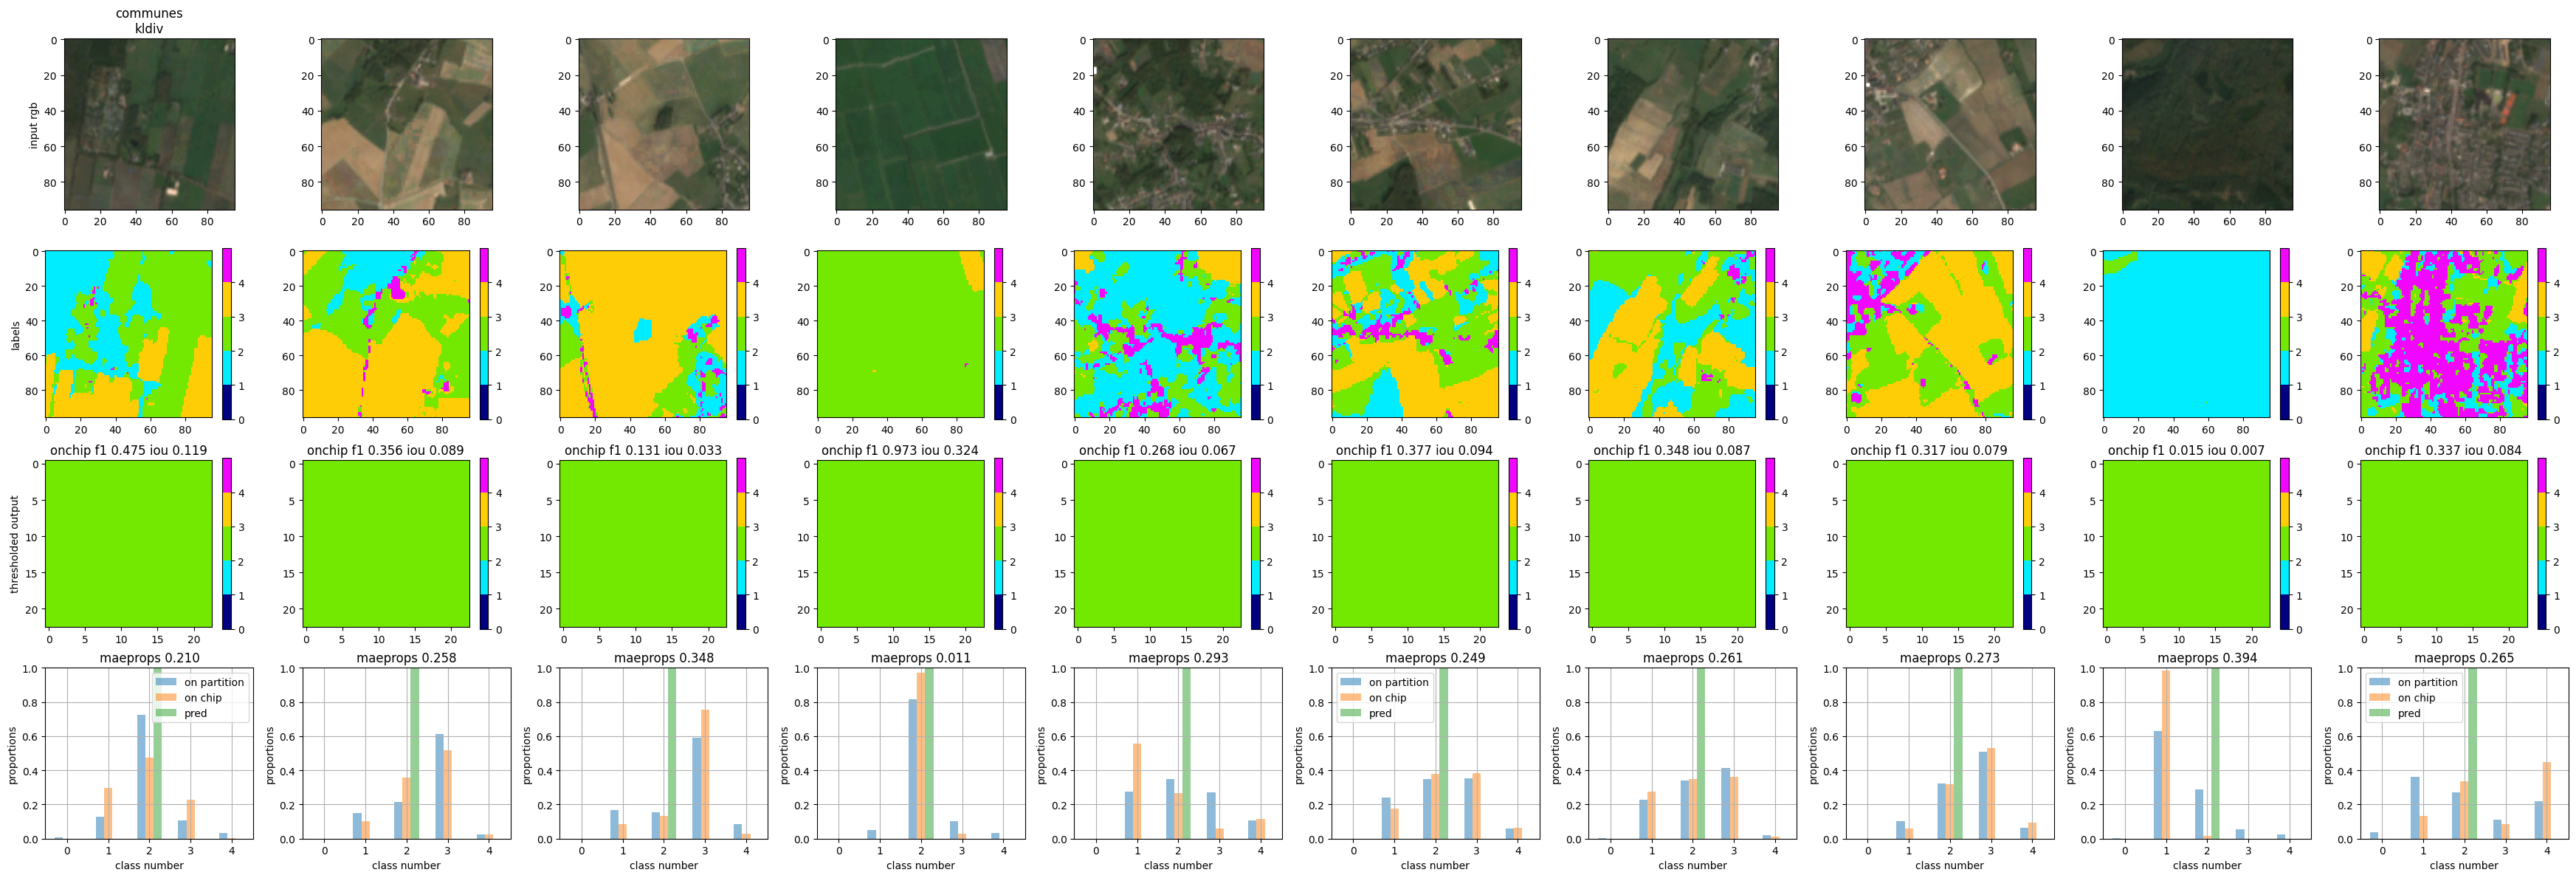

100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


--------
                            train       val      test
metric                                               
loss                     0.059205  0.047283  0.051547
f1 global                0.374969  0.366286  0.368746
iou global               0.090011  0.088794  0.088548
maeprops_on_chip global  0.250012  0.253486  0.252502
--------
                             train       val      test
metric                                                
f1 class_0                0.000000  0.000000  0.000000
f1 class_1                0.000000  0.000000  0.000000
f1 class_2                0.545422  0.536177  0.538808
f1 class_3                0.000000  0.000000  0.000000
f1 class_4                0.000000  0.000000  0.000000
iou class_0               0.000000  0.000000  0.000000
iou class_1               0.000000  0.000000  0.000000
iou class_2               0.374969  0.366286  0.368746
iou class_3               0.000000  0.000000  0.000000
iou class_4               0.000000  0.000000  0.00000

In [14]:
run.run()

# 4. Reload experiment

to continue fitting or do inference

In [16]:
runid = run.run_id
runid

'38nb578l'

In [17]:
previous_run = runs.Run.load_from(f"/tmp/{runid}.params").initialize()

autoinit on Run
using model Custom_DownsamplingSegmentation
using partitions communes
using loss kldiv
got 35666 chips in total
got    336 chips on 10 batches. cache size is 672
got     81 chips on 2 batches. cache size is 162
got     83 chips on 2 batches. cache size is 166
autoinit on Custom_DownsamplingSegmentation
setting input shape to (96, 96, 3)
convlayer {'kernel_size': 8, 'filters': 96, 'activation': 'relu', 'padding': 'valid', 'strides': 4, 'dropout': 0.1}
restoring model weights from file


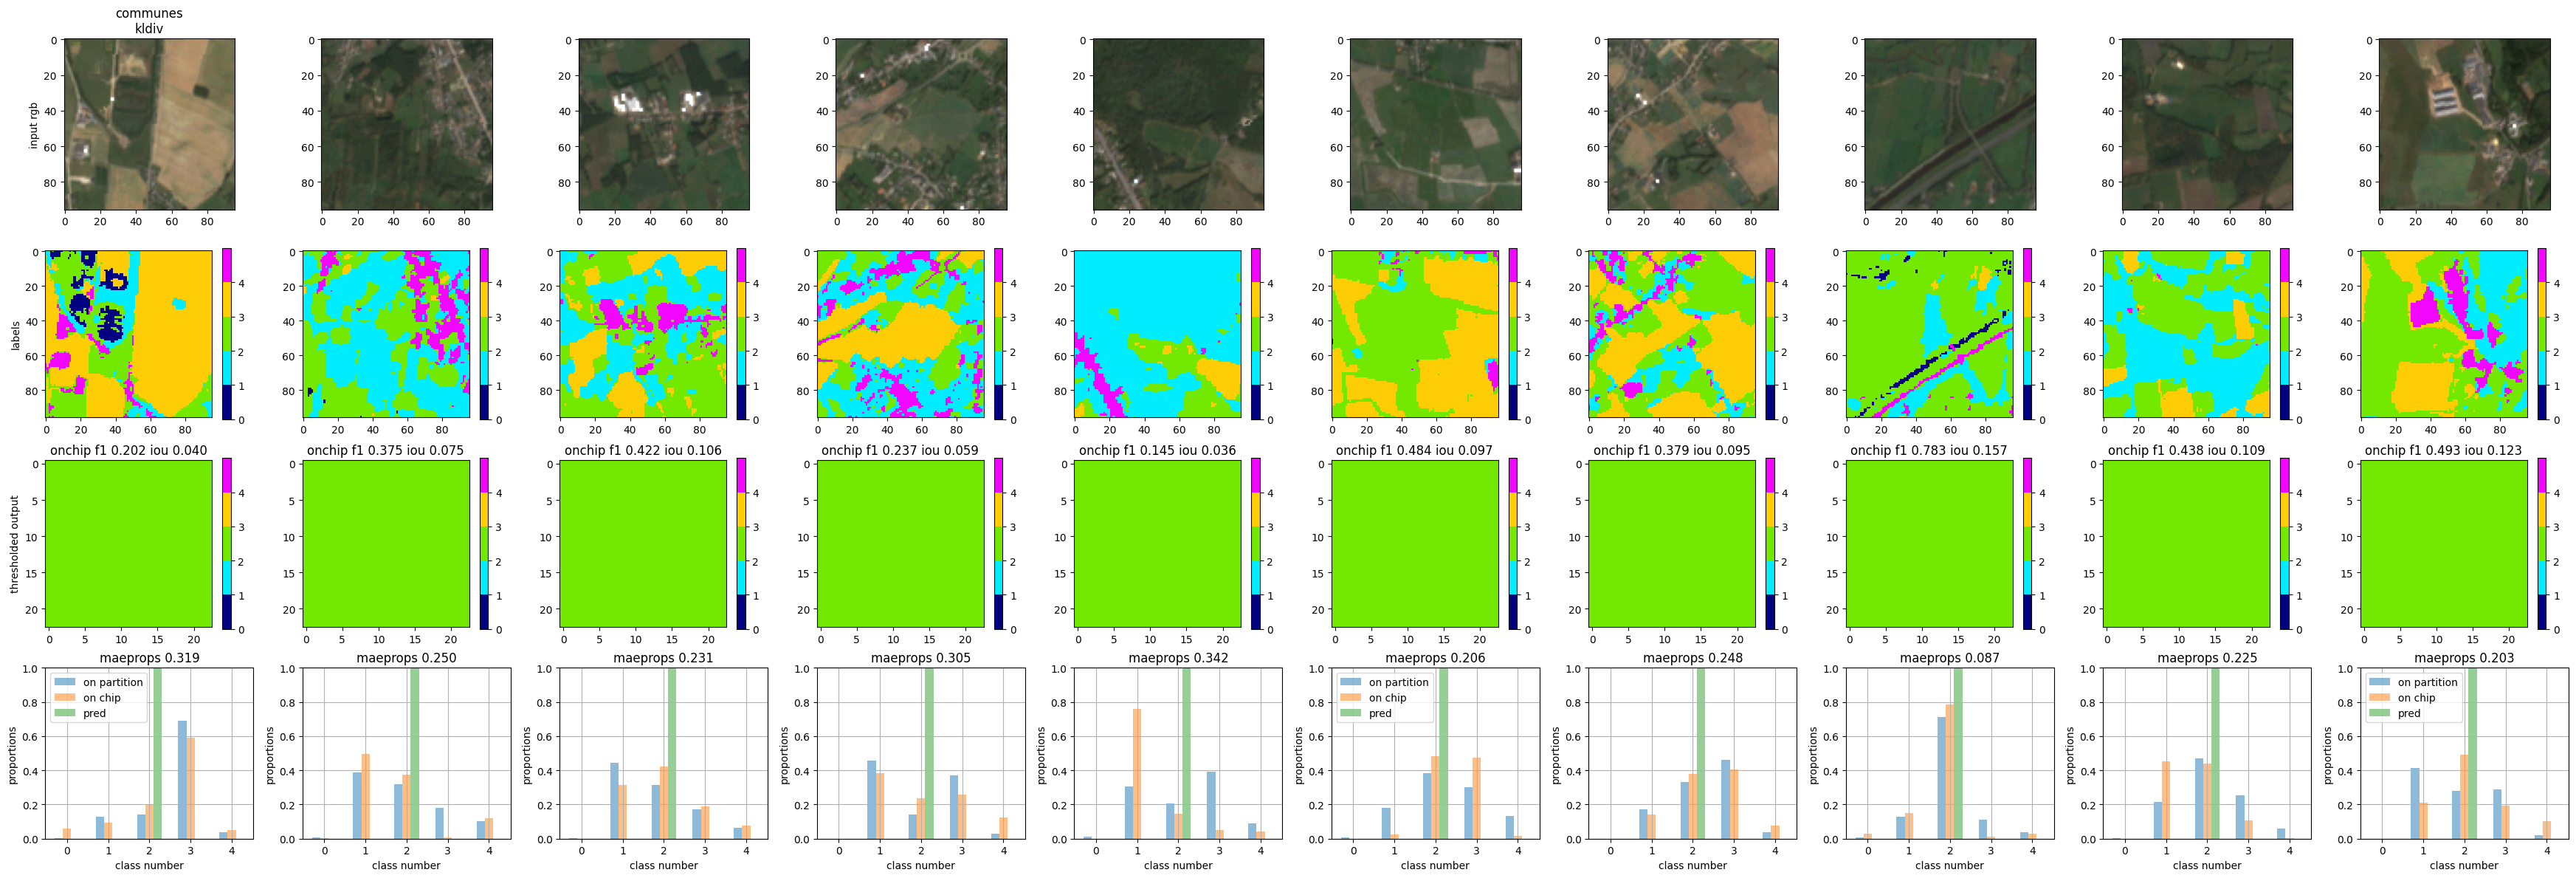

In [18]:
previous_run.plot_val_sample(10);